In [1]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import QuantileTransformer
def quantile_transform(quantdf, cols_to_be_transformed):
    scaler = QuantileTransformer(output_distribution= "normal")
    #quantdf[cols_to_be_transformed] = quantdf[cols_to_be_transformed].transform(np.log2)
    #quantdf.replace([np.inf, -np.inf], 0, inplace=True)
    #quantdf.replace(0, np.nan, inplace=True)
    quantdf[cols_to_be_transformed] = scaler.fit_transform(quantdf[cols_to_be_transformed])
    return quantdf

# PXD022545

In [4]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD022545/mzml_files/QuantifiedPeptides.tsv", sep="\t")

In [5]:
quant.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,4.283847e+05,3.554282e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,4.218002e+05,0.000000e+00,3.702424e+05,4.467311e+05,5.416972e+05,4.739509e+05,MSMS,NotDetected,MBR,MBR,MBR,MBR,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,1.234217e+07,6.922745e+06,2.289945e+07,1.128366e+07,7.312890e+06,2.035148e+07,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,6.348020e+05,9.899626e+05,4.568023e+05,5.797466e+05,1.731816e+05,1.732903e+05,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,4.915239e+05,9.159294e+05,6.800227e+05,9.423547e+05,7.290827e+05,8.027582e+05,MBR,MBR,MBR,MBR,MBR,MSMS,NaN


In [6]:
cols = ["Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234", "Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719", "Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239","Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01","Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02","Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03"]

In [7]:
quant[cols] = quant[cols].transform(np.log2)
quant.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,18.708547,18.439198,NaN,NaN,NaN,NaN,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,18.686200,NaN,18.498110,18.769047,19.047127,18.854378,MSMS,NotDetected,MBR,MBR,MBR,MBR,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,23.557093,22.722913,24.448810,23.427732,22.802010,24.278631,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,19.275947,19.917014,18.801210,19.145063,17.401927,17.402832,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,18.906902,19.804877,19.375223,19.845911,19.475723,19.614606,MBR,MBR,MBR,MBR,MBR,MSMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,YYTVFDRDNNRnan,YYTVFDRDNNR,CATD_HUMAN,NaN,NaN,NaN,21.288251,17.405195,22.810213,23.212167,22.866402,NotDetected,MBR,MBR,MSMS,MBR,MBR,NaN
34440,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,23.912277,24.432912,24.241373,24.839655,24.410443,24.475315,MSMS,MSMS,MSMS,MBR,MSMS,MBR,NaN
34441,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,21.069976,21.554548,22.416263,20.359512,17.004889,22.243194,MBR,MBR,MSMS,MBR,MBR,MBR,NaN
34442,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,24.573382,24.870090,25.505844,24.377755,23.681334,25.766640,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN


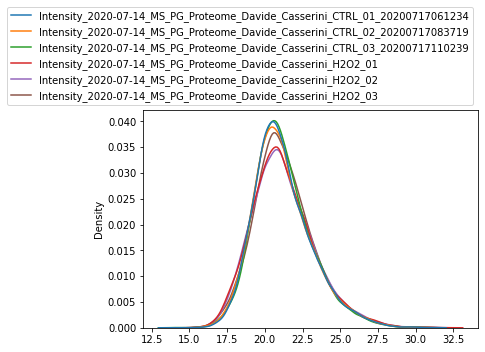

In [9]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [10]:
quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Detection Type_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,-1.458743,-1.600993,NaN,NaN,NaN,NaN,MSMS,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,-1.475589,NaN,-1.622624,-1.255172,-1.087372,-1.308203,MSMS,NotDetected,MBR,MBR,MBR,MBR,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,1.176102,0.845531,1.537399,1.086005,0.815580,1.435905,MSMS,MSMS,MSMS,MBR,MBR,MSMS,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,-1.070543,-0.617998,-1.426518,-1.031319,-2.179484,-2.169841,MBR,MSMS,MBR,MBR,MBR,MBR,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,-1.321196,-0.691092,-1.028544,-0.631539,-0.842509,-0.859833,MBR,MBR,MBR,MBR,MBR,MSMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,YYTVFDRDNNRnan,YYTVFDRDNNR,CATD_HUMAN,NaN,NaN,NaN,0.204963,-2.308480,0.841871,0.984261,0.877135,NotDetected,MBR,MBR,MSMS,MBR,MBR,NaN
34440,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,1.315888,1.491949,1.457803,1.579182,1.428699,1.505509,MSMS,MSMS,MSMS,MBR,MSMS,MBR,NaN
34441,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,0.080658,0.336251,0.731342,-0.343743,-2.503545,0.596753,MBR,MBR,MSMS,MBR,MBR,MBR,NaN
34442,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,1.546572,1.632808,1.885025,1.433058,1.166310,1.929389,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN


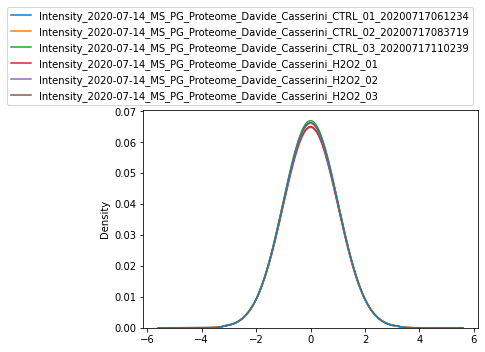

In [11]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [12]:
quant[cols] = quant[cols].transform(lambda x: x-(quant["Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719"].min()))

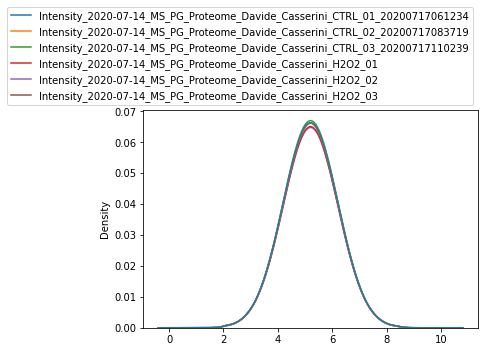

In [13]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

# PXD014381

In [14]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD014381/mzml_files/QuantifiedPeptides.tsv", sep="\t")

In [15]:
cols = ['Intensity_QX01983',
       'Intensity_QX01981_160316090220', 'Intensity_QX01867',
       'Intensity_QX01870', 'Intensity_QX01873', 'Intensity_QX01862',
       'Intensity_QX01865', 'Intensity_QX01868', 'Intensity_QX01984',
       'Intensity_QX01874', 'Intensity_QX01860', 'Intensity_QX01863',
       'Intensity_QX01866', 'Intensity_QX01869', 'Intensity_QX01872']

In [16]:
quant[cols] = quant[cols].transform(np.log2)
quant.replace([np.inf, -np.inf], np.nan, inplace=True)

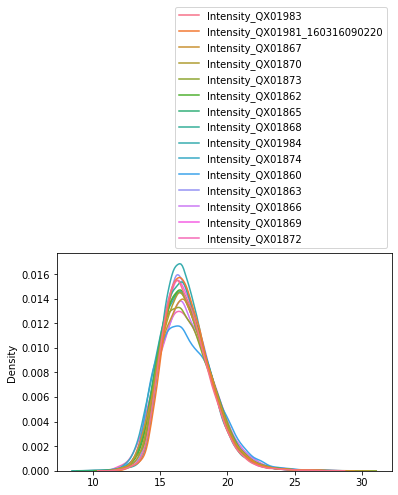

In [17]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

More normalization needed

In [18]:
quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_QX01983,Intensity_QX01981_160316090220,Intensity_QX01867,Intensity_QX01870,Intensity_QX01873,...,Detection Type_QX01865,Detection Type_QX01868,Detection Type_QX01984,Detection Type_QX01874,Detection Type_QX01860,Detection Type_QX01863,Detection Type_QX01866,Detection Type_QX01869,Detection Type_QX01872,Unnamed: 35
0,AAAAAAAAAAAAAAAAGATCLER20|[935]Atto495Maleimid...,AAAAAAAAAAAAAAAAGATCLER,NaN,NaN,NaN,-0.826699,-1.675655,-0.799177,-1.797903,-0.607656,...,MBR,MBR,NotDetected,MBR,MBR,NotDetected,NotDetected,MBR,MBR,NaN
1,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,PABP2_HUMAN,NaN,NaN,0.103910,NaN,0.970085,0.692421,0.423999,...,MBR,MBR,MBR,MSMS,MBR,MSMS,MBR,MBR,MBR,NaN
2,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,NaN,NaN,NaN,-0.027407,0.608729,...,NotDetected,NotDetected,NotDetected,NotDetected,MBR,NotDetected,NotDetected,NotDetected,MBR,NaN
3,AAAAAAAAVPSAGPAGPAPTSAAGR0|[9999530]Methyl_2H(...,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,NaN,NaN,-0.522349,-0.667073,-0.638672,-1.004359,-0.800689,...,MBR,MBR,MBR,MSMS,MBR,MBR,MBR,MBR,MBR,NaN
4,AAAAAAAAVPSAGPAGPAPTSAAGRnan,AAAAAAAAVPSAGPAGPAPTSAAGR,IRS2_HUMAN,NaN,NaN,0.036854,-0.117901,0.112989,0.170842,0.465032,...,MSMS,MSMS,MSMS,MSMS,MBR,MSMS,MSMS,MSMS,MSMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39163,YYVTIIDAPGHR2|[4]Carbamidomethyl[Y],YYVTIIDAPGHR,NaN,NaN,NaN,0.380780,1.441568,1.351970,1.267165,0.287619,...,MBR,MBR,MSMS,NotDetected,MBR,MBR,MBR,MSMS,MBR,NaN
39164,YYVTIIDAPGHRDFIK16|[320]Nethylmaleimide+water[K],YYVTIIDAPGHRDFIK,NaN,NaN,NaN,-1.597949,1.636384,-0.838151,1.323793,0.360809,...,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MBR,MSMS,NaN
39165,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,2.510557,2.805824,2.741970,2.716248,2.387144,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN
39166,YYVTIIDAPNHR10|Gly->Asn[G],YYVTIIDAPNHR,NaN,NaN,NaN,NaN,NaN,1.281543,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,MBR,NaN


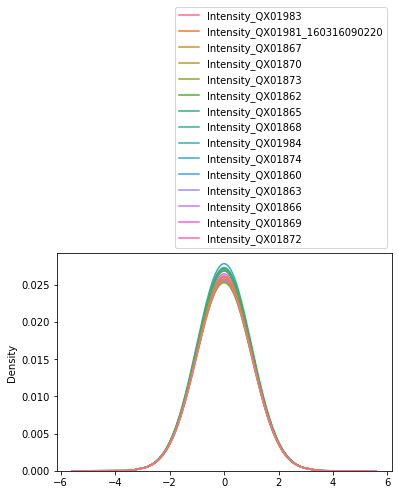

In [19]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [20]:
quant[cols] = quant[cols].transform(lambda x: x-(quant["Intensity_QX01983"].min()))

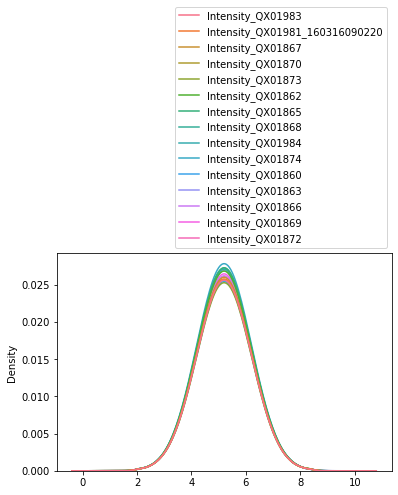

In [21]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

# PXD015122

In [22]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD015122/mzml_files/QuantifiedPeptides.tsv", sep="\t")

In [23]:
cols = ['Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D1-07',
       'Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D2-19',
       'Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D1-07',
       'Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D2-19',
       'Intensity_111017-MCF10A-RFP-glu-to-glu-wcl-D1-02',
       'Intensity_111017-MCF10A-RFP-glu-to-glu-wcl-D2-14',
       'Intensity_111717-MCF10A-RFP-glu-to-glu-wcl-JS-30ACN-D1-02',
       'Intensity_111717-MCF10A-RFP-glu-to-glu-wcl-JS-30ACN-D2-14',
       'Intensity_111017-MCF10A-RFP-glu-to-gal-wcl-D1-04',
       'Intensity_111017-MCF10A-RFP-glu-to-gal-wcl-D2-16',
       'Intensity_111717-MCF10A-RFP-glu-to-gal-wcl-JS-30ACN-D1-04',
       'Intensity_111717-MCF10A-RFP-glu-to-gal-wcl-JS-30ACN-D2-16',
       'Intensity_111017-MCF10A-MYC-gal-to-gal-wcl-D1-08',
       'Intensity_111017-MCF10A-MYC-gal-to-gal-wcl-D2-20',
       'Intensity_111717-MCF10A-MYC-gal-to-gal-wcl-JS-30ACN-D1-08',
       'Intensity_111717-MCF10A-MYC-gal-to-gal-wcl-JS-30ACN-D2-20',
       'Intensity_111017-MCF10A-MYC-glu-to-glu-wcl-D1-05',
       'Intensity_111017-MCF10A-MYC-glu-to-glu-wcl-D2-17',
       'Intensity_111717-MCF10A-MYC-glu-to-glu-wcl-JS-30ACN-D1-05',
       'Intensity_111717-MCF10A-MYC-glu-to-glu-wcl-JS-30ACN-D2-17',
       'Intensity_111017-MCF10A-MYC-glu-to-gal-wcl-D1-09',
       'Intensity_111017-MCF10A-MYC-glu-to-gal-wcl-D2-21',
       'Intensity_111717-MCF10A-MYC-glu-to-gal-wcl-JS-30ACN-D1-09',
       'Intensity_111717-MCF10A-MYC-glu-to-gal-wcl-JS-30ACN-D2-21',
       'Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D1-10',
       'Intensity_111017-MCF10A-mAKT-gal-to-gal-wcl-D2-22',
       'Intensity_111717-MCF10A-mAKT-gal-to-gal-wcl-JS-30ACN-D1-10',
       'Intensity_111717-MCF10A-mAKT-gal-to-gal-wcl-JS-30ACN-D2-22',
       'Intensity_111017-MCF10A-mAKT-glu-to-glu-wcl-D1-06',
       'Intensity_111017-MCF10A-mAKT-glu-to-glu-wcl-D2-18',
       'Intensity_111717-MCF10A-mAKT-glu-to-glu-wcl-JS-30ACN-D1-06',
       'Intensity_111717-MCF10A-mAKT-glu-to-glu-wcl-JS-30ACN-D2-18',
       'Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D1-03',
       'Intensity_111017-MCF10A-mAKT-glu-to-gal-wcl-D2-15',
       'Intensity_111717-MCF10A-mAKT-glu-to-gal-wcl-JS-30ACN-D1-03',
       'Intensity_111717-MCF10A-mAKT-glu-to-gal-wcl-JS-30ACN-D2-15',]

In [24]:
quant[cols] = quant[cols].transform(np.log2)
quant.replace([np.inf, -np.inf], np.nan, inplace=True)

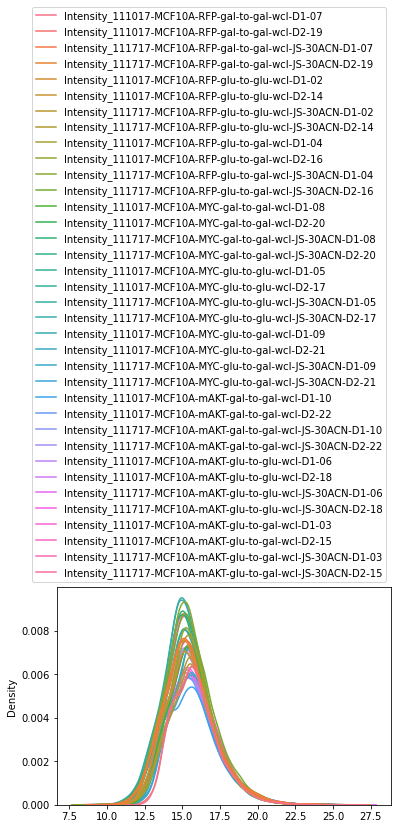

In [25]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [26]:
quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D1-07,Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D2-19,Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D1-07,Intensity_111717-MCF10A-RFP-gal-to-gal-wcl-JS-30ACN-D2-19,Intensity_111017-MCF10A-RFP-glu-to-glu-wcl-D1-02,...,Detection Type_111717-MCF10A-mAKT-gal-to-gal-wcl-JS-30ACN-D2-22,Detection Type_111017-MCF10A-mAKT-glu-to-glu-wcl-D1-06,Detection Type_111017-MCF10A-mAKT-glu-to-glu-wcl-D2-18,Detection Type_111717-MCF10A-mAKT-glu-to-glu-wcl-JS-30ACN-D1-06,Detection Type_111717-MCF10A-mAKT-glu-to-glu-wcl-JS-30ACN-D2-18,Detection Type_111017-MCF10A-mAKT-glu-to-gal-wcl-D1-03,Detection Type_111017-MCF10A-mAKT-glu-to-gal-wcl-D2-15,Detection Type_111717-MCF10A-mAKT-glu-to-gal-wcl-JS-30ACN-D1-03,Detection Type_111717-MCF10A-mAKT-glu-to-gal-wcl-JS-30ACN-D2-15,Unnamed: 77
0,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,0.077764,0.304637,NaN,-1.299180,-0.520740,...,MSMS,MBR,MBR,MSMS,MSMS,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAAAAAAAAAAGAGAGAKx|[931]Ethyl+Deamidated[N],AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,-0.983477,NaN,-1.579093,-0.239654,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,MBR,NotDetected,NotDetected,NotDetected,NotDetected,NaN
2,AAAAAAAAAAAAAAASGFAYPGTSERx|[1000]AHA-Alkyne[M],AAAAAAAAAAAAAAASGFAYPGTSER,;HXD13_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
3,AAAAAAAAAAAAAAASGFAYPGTSERx|[31]Pyridylethyl[C],AAAAAAAAAAAAAAASGFAYPGTSER,NaN,NaN,NaN,NaN,1.526195,NaN,NaN,0.932885,...,NotDetected,MBR,MBR,NotDetected,NotDetected,MBR,MBR,NotDetected,NotDetected,NaN
4,AAAAAAAAAAAAAAATAASAAASAILGGR23|[928]MercaptoE...,AAAAAAAAAAAAAAATAASAAASAILGGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59130,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,0.078424,0.170669,0.406966,0.591619,0.953779,...,MSMS,MSMS,MBR,MBR,MSMS,MBR,MSMS,MBR,MBR,NaN
59131,YYVTIIDAPGHR1|[5]Carbamyl[Y],YYVTIIDAPGHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotDetected,NotDetected,NotDetected,MBR,NotDetected,NotDetected,MBR,MBR,MSMS,NaN
59132,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,0.563693,-0.036739,-1.116185,NaN,0.801476,...,MBR,NotDetected,NotDetected,NotDetected,MBR,MBR,MBR,MSMS,MSMS,NaN
59133,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MBR,NotDetected,NotDetected,MBR,MBR,MBR,MBR,MSMS,MSMS,NaN


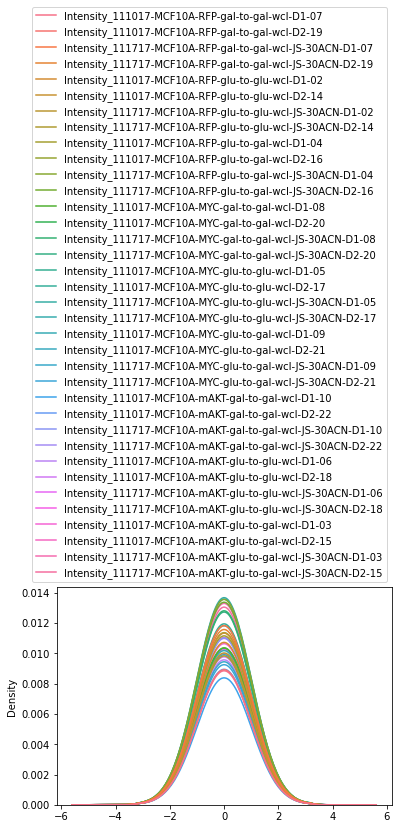

In [27]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [28]:
quant[cols] = quant[cols].transform(lambda x: x-(quant["Intensity_111017-MCF10A-RFP-gal-to-gal-wcl-D1-07"].min()))

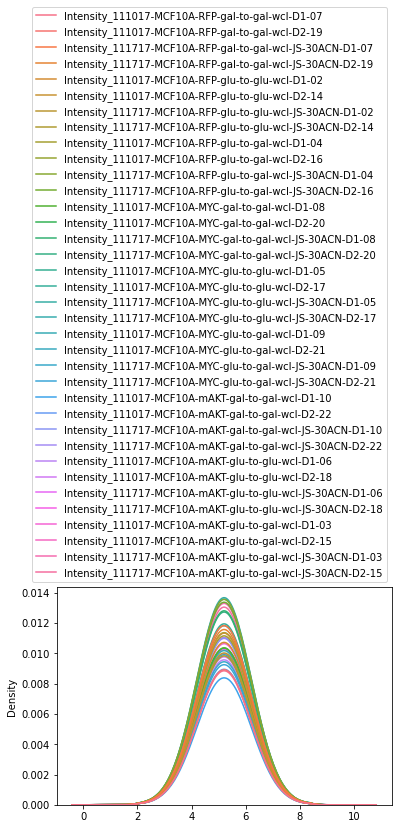

In [30]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [31]:
from sklearn.preprocessing import QuantileTransformer
def quantile_transform(quantdf, cols_to_be_transformed):
    scaler = QuantileTransformer(output_distribution= "normal")
    quantdf[cols_to_be_transformed] = quantdf[cols_to_be_transformed].transform(np.log2)
    quantdf.replace([np.inf, -np.inf], 0, inplace=True)
    quantdf.replace(0, np.nan, inplace=True)
    quantdf[cols_to_be_transformed] = scaler.fit_transform(quantdf[cols_to_be_transformed])
    quantdf[cols] = quantdf[cols].transform(lambda x: x - (quantdf[cols_to_be_transformed[0]].min()))
    return quantdf

# PXD016278

In [32]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD016278/raw_files/QuantifiedPeptides.tsv", sep= "\t")
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD016278/flashlfq/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)
quant.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2,...,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24,Unnamed: 101
0,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000,0.0,0.0,...,2.016063e+05,6.783181e+05,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN
1,AAAAAAAAAKnan,AAAAAAAAAK,PHX2B_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,NaN,NaN,NaN,3.159841e+06,263986.097656,0.000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000,0.0,0.0,...,1.550330e+06,2.073836e+06,0.0,0.0,0.0,0.0,3.529714e+06,2.289962e+07,0.0,NaN
4,AAAAAAAAGAFAGRR15|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,6137970.625,8516465.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN


In [34]:
cols = ['Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction06_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction07_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction08_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction09_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction10_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction11_180630160426',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction12',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction13',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction14',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction15',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction16',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction17',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction18',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction19',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction20',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction21',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction22',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction23',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction24',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction01',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction02R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction03',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction04',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction05',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction06',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction07',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction08',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction09',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction10',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction11',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction12',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction13',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction14',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction15',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24']

In [36]:
quant = quantile_transform(quant, cols)

In [37]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2,...,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24,Unnamed: 101
0,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.390564,4.591591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAAAAAKnan,AAAAAAAAAK,PHX2B_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,NaN,NaN,NaN,5.637227,4.559807,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.721060,5.302797,NaN,NaN,NaN,NaN,5.119764,6.087938,NaN,NaN
4,AAAAAAAAGAFAGRR15|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,5.800457,5.9264,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108603,YYYAVYDMVVR8|[35]oxidation[M],YYYAVYDMVVR,LAMB1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108604,YYYAVYDMVVRnan,YYYAVYDMVVR,LAMB1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.493853,4.649724,NaN,NaN,NaN,NaN,NaN,NaN,4.697697,NaN
108605,YYYDGKDYIEFNK6|[4]Carbamidomethyl[K],YYYDGKDYIEFNK,ZA2G_HUMAN,NaN,NaN,5.059302,4.700496,NaN,NaN,5.026743,...,4.376073,4.549171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108606,YYYDGKDYIEFNKnan,YYYDGKDYIEFNK,ZA2G_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


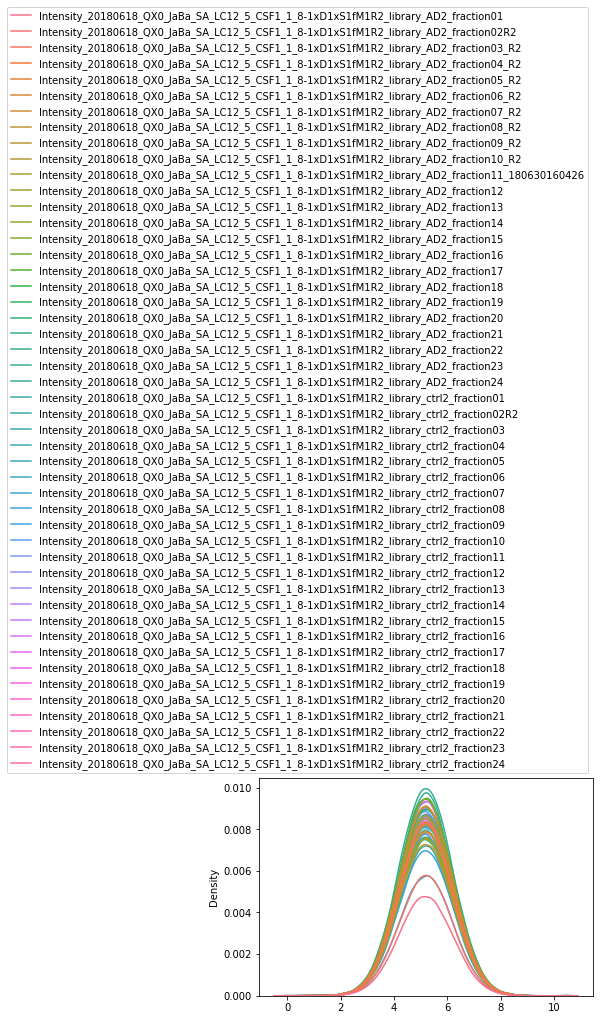

In [38]:
ax = sns.kdeplot(data=quant[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))